In [5]:
import numpy as np
# boiler plate imports
import torch
from tqdm import tqdm
# import sigpy as sp
import matplotlib.pyplot as plt
import os
from skimage.metrics import structural_similarity as ssim
from forwards import LSI_utils, InPaint_utils, CS_utils
from opt import conjgrad
from utils import power_iteration

In [24]:
cont = torch.load('/home/blevac/diffuser-cam/DiffuserCam-Tutorial/tutorial/diffsuer_data.pt')
print(cont.keys())
psf = torch.tensor(cont['psf'])[None,None].cuda()
meas = torch.tensor(cont['meas'])[None,None].cuda()
print(psf.shape)
print(meas.shape)
# forward model for specific inverse problem
H = psf.shape[-2]
W = psf.shape[-1]
batch_size=1

utils = LSI_utils(psf=psf,H=H,W=W)
A_forw = utils.forward
A_adj = utils.adjoint
A_norm = utils.normal
b = A_adj(meas)

dict_keys(['psf', 'meas'])
torch.Size([1, 1, 150, 200])
torch.Size([1, 1, 150, 200])


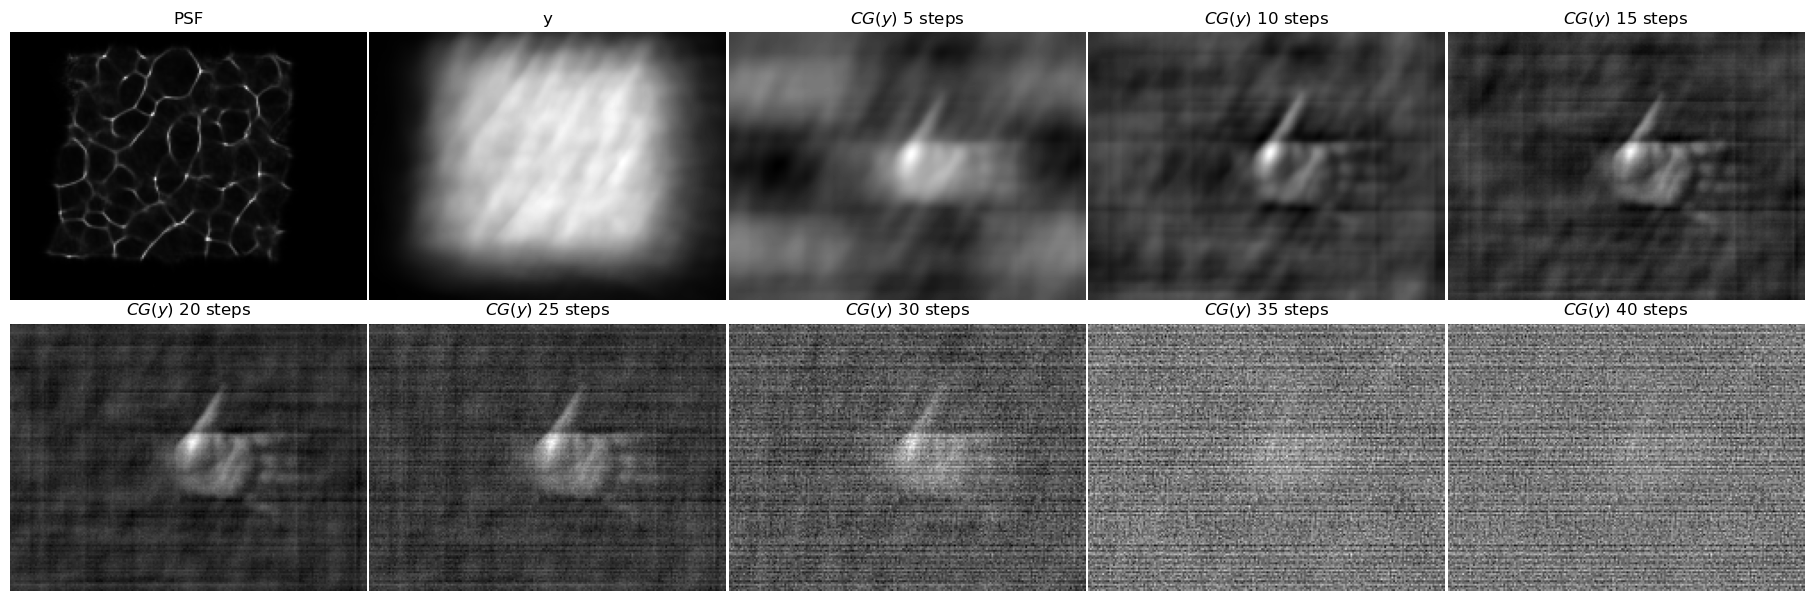

In [25]:
verbose=False
# x_norm = A_norm(gt_img)
plt.figure(figsize=(18,6))
plt.subplot(2,5,1)
plt.title('PSF')
plt.imshow((psf[0].permute(-2,-1,0).cpu() + 1) /2, cmap='gray')
plt.axis('off')
plt.subplot(2,5,2)
plt.title('y')
plt.imshow((meas[0].permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
plt.axis('off')

lam = 0
num_steps=5
out, _ = conjgrad(x=b, b=b, normal=A_norm, max_iter=num_steps, l2lam=lam, eps=1e-4, verbose=verbose, complex=True, device='cpu')
plt.subplot(2,5,3)
plt.title(f'$CG(y)$ {num_steps} steps')
plt.imshow((out[0].permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
plt.axis('off')
num_steps=10
out, _ = conjgrad(x=b, b=b, normal=A_norm, max_iter=num_steps, l2lam=lam, eps=1e-4, verbose=verbose, complex=True, device='cpu')
plt.subplot(2,5,4)
plt.title(f'$CG(y)$ {num_steps} steps')
plt.imshow((out[0].permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
plt.axis('off')
num_steps=15
out, _ = conjgrad(x=b, b=b, normal=A_norm, max_iter=num_steps, l2lam=lam, eps=1e-4, verbose=verbose, complex=True, device='cpu')
plt.subplot(2,5,5)
plt.title(f'$CG(y)$ {num_steps} steps')
plt.imshow((out[0].permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
plt.axis('off')
num_steps=20
out, _ = conjgrad(x=b, b=b, normal=A_norm, max_iter=num_steps, l2lam=lam, eps=1e-4, verbose=verbose, complex=True, device='cpu')
plt.subplot(2,5,6)
plt.title(f'$CG(y)$ {num_steps} steps')
plt.imshow((out[0].permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
plt.axis('off')
num_steps=25
out, _ = conjgrad(x=b, b=b, normal=A_norm, max_iter=num_steps, l2lam=lam, eps=1e-4, verbose=verbose, complex=True, device='cpu')
plt.subplot(2,5,7)
plt.title(f'$CG(y)$ {num_steps} steps')
plt.imshow((out[0].permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
plt.axis('off')
num_steps=30
out, _ = conjgrad(x=b, b=b, normal=A_norm, max_iter=num_steps, l2lam=lam, eps=1e-4, verbose=verbose, complex=True, device='cpu')
plt.subplot(2,5,8)
plt.title(f'$CG(y)$ {num_steps} steps')
plt.imshow((out[0].permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
plt.axis('off')
num_steps=35
out, _ = conjgrad(x=b, b=b, normal=A_norm, max_iter=num_steps, l2lam=lam, eps=1e-4, verbose=verbose, complex=True, device='cpu')
plt.subplot(2,5,9)
plt.title(f'$CG(y)$ {num_steps} steps')
plt.imshow((out[0].permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
plt.axis('off')
num_steps=40
out, _ = conjgrad(x=b, b=b, normal=A_norm, max_iter=num_steps, l2lam=lam, eps=1e-4, verbose=verbose, complex=True, device='cpu')
plt.subplot(2,5,10)
plt.title(f'$CG(y)$ {num_steps} steps')
plt.imshow((out[0].permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
plt.axis('off')
# num_steps=50
# out, _ = conjgrad(x=b, b=b, normal=A_norm, max_iter=num_steps, l2lam=0., eps=1e-4, verbose=True, complex=True, device='cpu')
# plt.subplot(2,5,10)
# plt.title(f'$CG(y)$ {num_steps} steps')
# plt.imshow((out[0].permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
# plt.axis('off')

plt.tight_layout(pad=0.2)


## Power Iteration

In [1]:
# print(utils.A.shape)
# A_eign_vals = torch.linalg.eigvals(utils.A)
# print(torch.max(abs(A_eign_vals)))
# A_A_t = torch.matmul(utils.A.T,utils.A)
# A_norm_eign_vals = torch.linalg.eigvals(A_A_t)
# print(torch.max(abs(A_norm_eign_vals)))
# print(torch.min(abs(A_norm_eign_vals)))

In [22]:
max_eig, min_eig, cond_num = power_iteration(A_normal=A_norm,input_shape=psf.shape,iter=10000,device='cuda', dtype=torch.float64)
print(max_eig)
print(min_eig)

100%|██████████| 10000/10000 [00:19<00:00, 511.14it/s]


tensor(1., device='cuda:0', dtype=torch.float64)
tensor(3.8789e-05, device='cuda:0', dtype=torch.float64)
